<a href="https://colab.research.google.com/github/Santhosh-KS/MachineLearning_Concepts/blob/master/test_lesson_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch

<img src="assets/simple_neuron.png" width=400px>

In [0]:
def activation(x):
    """ Sigmoid activation function 
    
        Arguments
        ---------
        x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))

In [0]:
torch.manual_seed(7)

In [0]:
features = torch.randn((1,5))
features.shape[0], features.shape[1]

(1, 5)

In [0]:
weights = torch.rand_like(features)
weights.shape

torch.Size([1, 5])

In [0]:
bias = torch.randn((1,1))
bias.shape

torch.Size([1, 1])

In [0]:
y = activation(torch.sum(features * weights) + bias)
y

tensor([[0.6140]])

## Stack it up


<img src='assets/multilayer_diagram_weights.png' width=450px>

In [0]:
torch.manual_seed(7)

In [0]:
features = torch.randn(1,3)

In [0]:
n_inputs = features.shape[1]
n_hidden = 2
n_output = 1

In [0]:
#Weights for input to hidden layer
W1 = torch.randn(n_inputs, n_hidden)

#Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)
W1.shape, W2.shape

(torch.Size([3, 2]), torch.Size([2, 1]))

In [0]:
# and bias terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))
B1.shape, B2.shape

(torch.Size([1, 2]), torch.Size([1, 1]))

In [0]:
h = activation(torch.mm(features, W1) + B1)
y = activation(torch.mm(h, W2) + B2)
y.shape, y

(torch.Size([1, 1]), tensor([[0.3171]]))

## MNIST Data set handling

In [0]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [0]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


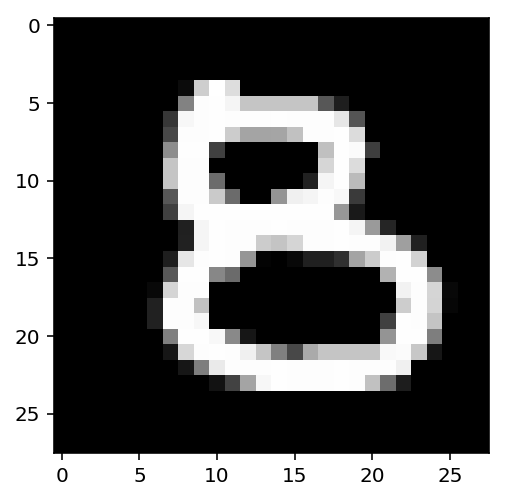

In [0]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [0]:
images[1].shape

torch.Size([1, 28, 28])

In [0]:
# Flatten the input images
inputs = images.view(images.shape[0], -1)
inputs.shape

torch.Size([64, 784])

In [0]:
w1 = torch.randn(inputs.shape[1], 256)
b1 = torch.randn(256)
w1.shape, b1.shape

(torch.Size([784, 256]), torch.Size([256]))

In [0]:
w2 = torch.randn(256, 10)
b2 = torch.randn(10)
w2.shape, b2.shape

(torch.Size([256, 10]), torch.Size([10]))

In [0]:
h = activation(torch.mm(inputs, w1) + b1)
out = activation(torch.mm(h, w2) + b2)
out.shape

torch.Size([64, 10])

## Softmax 

$$
\Large \sigma(x_i) = \cfrac{e^{x_i}}{\sum_k^K{e^{x_k}}}
$$


In [0]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)

In [0]:
probabilities = softmax(out)
probabilities.shape

torch.Size([64, 10])

In [0]:
val = torch.exp(out)
val.shape

torch.Size([64, 10])

In [0]:
val = torch.sum(torch.exp(out))
val.shape

torch.Size([])

In [0]:
val = torch.sum(torch.exp(out), dim=0)
val.shape

torch.Size([10])

In [0]:
val = torch.sum(torch.exp(out), dim=1)
val.shape

torch.Size([64])

In [0]:
val = torch.sum(torch.exp(out), dim=1).view(-1,1)
val.shape

torch.Size([64, 1])

In [0]:
from torch import nn

In [0]:
??nn.Linear

Init signature: nn.Linear(in_features, out_features, bias=True)
Source:        
class Linear(Module):
    r"""Applies a linear transformation to the incoming data: :math:`y = xA^T + b`

    Args:
        in_features: size of each input sample
        out_features: size of each output sample
        bias: If set to False, the layer will not learn an additive bias.
            Default: ``True``

    Shape:
        - Input: :math:`(N, *, \text{in\_features})` where :math:`*` means any number of
          additional dimensions
        - Output: :math:`(N, *, \text{out\_features})` where all but the last dimension
          are the same shape as the input.

    Attributes:
        weight: the learnable weights of the module of shape
            :math:`(\text{out\_features}, \text{in\_features})`. The values are
            initialized from :math:`\mathcal{U}(-\sqrt{k}, \sqrt{k})`, where
            :math:`k = \frac{1}{\text{in\_features}}`
        bias:   the learnable bias of the module of

In [0]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

Functional way of defining the same network using the 
```python
import torch.nn.functional as F

```

In [0]:
import torch.nn.functional as F


In [0]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [0]:
class ReluNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.input = nn.Linear(784, 128)
        self.fc1 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.input(x))
        x = F.relu(self.fc1(x))
        x = F.softmax(self.output(x), dim=1)
        
        return x
        

In [0]:
model = ReluNetwork()
model

ReluNetwork(
  (input): Linear(in_features=784, out_features=128, bias=True)
  (fc1): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

## Using nn.sequential

In [0]:
from torch import nn

In [0]:
input_size = 784
hidden_layer_size = [128, 64]
output_size = 10

In [0]:
model = nn.Sequential(nn.Linear(input_size, hidden_layer_size[0]),
                     nn.ReLU(),
                     nn.Linear(hidden_layer_size[0], hidden_layer_size[1]),
                     nn.ReLU(),
                     nn.Linear(hidden_layer_size[1], output_size),
                     nn.Softmax(dim=1))
model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)

In [0]:
model[0].weight

Parameter containing:
tensor([[ 0.0287,  0.0355,  0.0251,  ..., -0.0186, -0.0032, -0.0252],
        [ 0.0186, -0.0123,  0.0304,  ..., -0.0323,  0.0076, -0.0285],
        [ 0.0321,  0.0202,  0.0026,  ...,  0.0114,  0.0333,  0.0094],
        ...,
        [ 0.0257,  0.0089,  0.0285,  ..., -0.0113, -0.0331, -0.0061],
        [-0.0197, -0.0176, -0.0343,  ..., -0.0136, -0.0277,  0.0283],
        [-0.0165,  0.0100,  0.0062,  ...,  0.0319, -0.0143,  0.0339]],
       requires_grad=True)

In [0]:
from collections import OrderedDict

model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_layer_size[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_layer_size[0], hidden_layer_size[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_layer_size[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

In [0]:
model.fc1.weight

Parameter containing:
tensor([[-0.0243, -0.0273, -0.0054,  ..., -0.0309,  0.0147,  0.0201],
        [-0.0133, -0.0274,  0.0301,  ..., -0.0059, -0.0136,  0.0166],
        [-0.0009,  0.0086, -0.0031,  ..., -0.0207,  0.0269,  0.0340],
        ...,
        [ 0.0103, -0.0232,  0.0330,  ..., -0.0261,  0.0005, -0.0154],
        [ 0.0264, -0.0312, -0.0163,  ..., -0.0113,  0.0307, -0.0311],
        [ 0.0033, -0.0062,  0.0218,  ..., -0.0085, -0.0077,  0.0065]],
       requires_grad=True)

In [0]:
# Define the loss
criterion = nn.CrossEntropyLoss()
criterion

CrossEntropyLoss()

**CrossEntropy loss definition**
$$ \large \text{loss}(x, class) = -\log\left(\frac{\exp(x[class])}{\sum_j \exp(x[j])}\right)  = -x[class] + \log\left(\sum_j \exp(x[j])\right) $$

OR

$$ \large     \text{loss}(x, class) = weight[class] \left(-x[class] + \log\left(\sum_j \exp(x[j])\right)\right) $$

In [0]:
# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3042, grad_fn=<NllLossBackward>)


**Exercise:** Build a model that returns the `log-softmax` as the output and calculate the loss using the negative log likelihood loss. Note that for `nn.LogSoftmax` and ` F.log_softmax` you'll need to set the dim keyword argument appropriately. `dim=0` calculates softmax across the rows, so each column sums to 1, while `dim=1` calculates across the columns so each row sums to 1. Think about what you want the output to be and choose dim appropriately.

In [0]:
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_layer_size[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_layer_size[0], hidden_layer_size[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_layer_size[1], output_size)),
                      ('softmax', nn.LogSoftmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): LogSoftmax()
)

In [0]:
criterion = nn.NLLLoss()
criterion

NLLLoss()

In [0]:
# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3015, grad_fn=<NllLossBackward>)


## Losses in PyTorch

In [0]:
model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(784, 128)),
    ('Relu1', nn.ReLU()),
    ('fc2', nn.Linear(128, 64)),
    ('Relu2', nn.ReLU()),
    ('output', nn.Linear(64, 10)),
    ('logSoftmax', nn.LogSoftmax(dim=1))
    
]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (Relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (Relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (logSoftmax): LogSoftmax()
)

In [0]:
criterion = nn.NLLLoss()

In [0]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)
# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

In [0]:
# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logPs = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logPs, labels)

print(loss)

tensor(2.3196, grad_fn=<NllLossBackward>)


In [0]:
loss.backward()
print('Gradient -', model.fc1.weight.grad)

Gradient - tensor([[-5.1349e-03, -5.1349e-03, -5.1349e-03,  ..., -5.1349e-03,
         -5.1349e-03, -5.1349e-03],
        [ 5.8969e-04,  5.8969e-04,  5.8969e-04,  ...,  5.8969e-04,
          5.8969e-04,  5.8969e-04],
        [-2.3754e-03, -2.3754e-03, -2.3754e-03,  ..., -2.3754e-03,
         -2.3754e-03, -2.3754e-03],
        ...,
        [ 2.6402e-03,  2.6402e-03,  2.6402e-03,  ...,  2.6402e-03,
          2.6402e-03,  2.6402e-03],
        [ 5.2306e-05,  5.2306e-05,  5.2306e-05,  ...,  5.2306e-05,
          5.2306e-05,  5.2306e-05],
        [-1.7939e-03, -1.7939e-03, -1.7939e-03,  ..., -1.7939e-03,
         -1.7939e-03, -1.7939e-03]])


In [0]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model.fc1.weight.grad)

Updated weights -  tensor([[-5.1349e-03, -5.1349e-03, -5.1349e-03,  ..., -5.1349e-03,
         -5.1349e-03, -5.1349e-03],
        [ 5.8969e-04,  5.8969e-04,  5.8969e-04,  ...,  5.8969e-04,
          5.8969e-04,  5.8969e-04],
        [-2.3754e-03, -2.3754e-03, -2.3754e-03,  ..., -2.3754e-03,
         -2.3754e-03, -2.3754e-03],
        ...,
        [ 2.6402e-03,  2.6402e-03,  2.6402e-03,  ...,  2.6402e-03,
          2.6402e-03,  2.6402e-03],
        [ 5.2306e-05,  5.2306e-05,  5.2306e-05,  ...,  5.2306e-05,
          5.2306e-05,  5.2306e-05],
        [-1.7939e-03, -1.7939e-03, -1.7939e-03,  ..., -1.7939e-03,
         -1.7939e-03, -1.7939e-03]])


### Solution to the exercise

In [0]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
    
        # Forward pass, get our logits
        logPs = model(images)
        # Calculate the loss with the logits and the labels
        loss = criterion(logPs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9535487583959534
Training loss: 0.8826937061637196
Training loss: 0.5210850212746846
Training loss: 0.430984058884034
Training loss: 0.3894831794760883


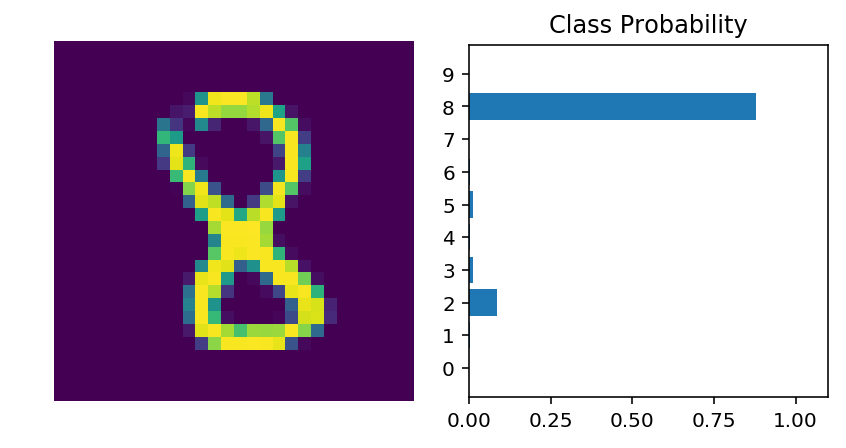

In [0]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
#ps = logps
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)

## What will happen??
**Invalid resluts when we do** 
```python
optimizer.zero_grad()
```
**at wrong place**

In [0]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    optimizer.zero_grad() # --> Not the correct place to reset the optimizer
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        
    
        # TODO: Training pass
        # Forward pass, get our logits
        logPs = model(images)
        # Calculate the loss with the logits and the labels
        loss = criterion(logPs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.3615958505729113
Training loss: 2.3662244434804043
Training loss: 2.4364235492657498
Training loss: 2.3876839103475054
Training loss: 2.380625469344003


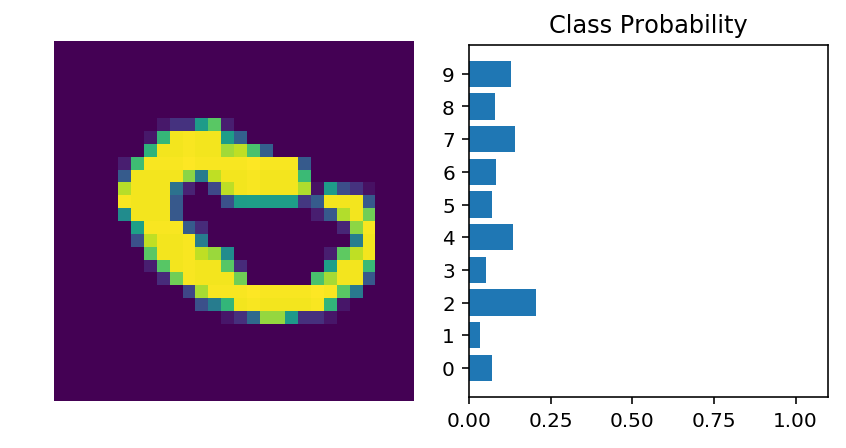

In [0]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)

In [0]:
??helper.view_classify

Signature: helper.view_classify(img, ps, version='MNIST')
Source:   
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2